In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install prophet

In [3]:
#pip install pystan

In [6]:
df = pd.read_csv('Demand_Forecasting_Orders.csv')

In [7]:
df.shape

(60, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      60 non-null     object 
 1   CompanyA                                   60 non-null     float64
 2   CompanyB                                   60 non-null     float64
 3   Company C                                  60 non-null     float64
 4   Non-urgent order                           60 non-null     float64
 5   Urgent order                               60 non-null     float64
 6   Revenue                                    60 non-null     int64  
 7   Order type A                               60 non-null     float64
 8   Order type B                               60 non-null     int64  
 9   Order type C                               60 non-null     int64  
 10  Fiscal sector orders        

In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Month                                      60 non-null     datetime64[ns]
 1   CompanyA                                   60 non-null     float64       
 2   CompanyB                                   60 non-null     float64       
 3   Company C                                  60 non-null     float64       
 4   Non-urgent order                           60 non-null     float64       
 5   Urgent order                               60 non-null     float64       
 6   Revenue                                    60 non-null     int64         
 7   Order type A                               60 non-null     float64       
 8   Order type B                               60 non-null     int64         
 9   Order type C           

In [13]:
import statsmodels.api as sm

In [14]:
sm.stats.durbin_watson(df['CompanyA'])

0.21232813979170553

In [15]:
sm.stats.durbin_watson(df['CompanyB'])

0.08599877462943821

In [16]:
sm.stats.durbin_watson(df['Revenue'])

0.005389314120579476

<Axes: >

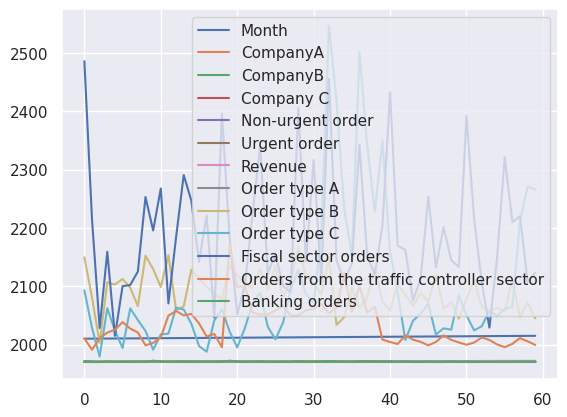

In [17]:
df.plot()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

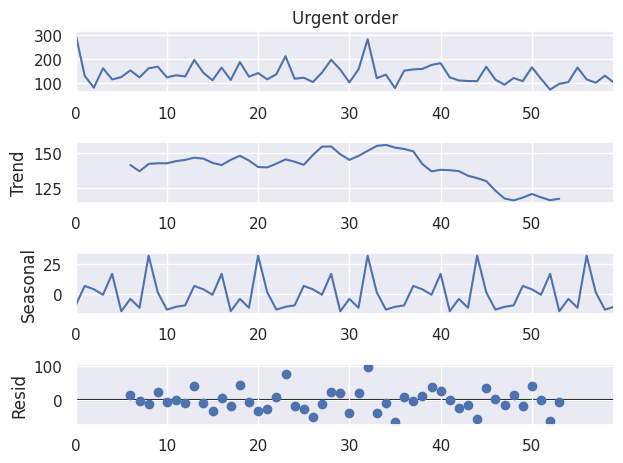

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Urgent order'], period=12)
decomposition.plot()
plt.show()

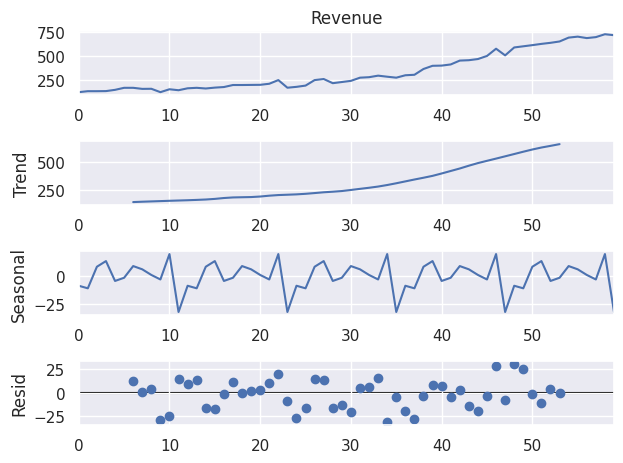

In [24]:
decomposition = seasonal_decompose(df['Revenue'], period=12)
decomposition.plot()
plt.show()

In [25]:
total = df.groupby(['Month'])['Non-urgent order','Urgent order', 'Revenue','Banking orders'].sum().reset_index()

In [26]:
df_prophet = total.rename(columns={'Month':'ds', 'Revenue':'y'})

In [27]:
from prophet import Prophet

In [28]:
m = Prophet()

In [29]:
model = m.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgraobcu3/57dyj_nh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgraobcu3/ztlj84yq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41908', 'data', 'file=/tmp/tmpgraobcu3/57dyj_nh.json', 'init=/tmp/tmpgraobcu3/ztlj84yq.json', 'output', 'file=/tmp/tmpgraobcu3/prophet_modelem60zin9/prophet_model-20230409115317.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [31]:
future_global = model.make_future_dataframe(periods=61, freq='M')

In [32]:
future_global

,ds
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
...,...
116,2019-08-31
117,2019-09-30
118,2019-10-31
119,2019-11-30


In [33]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,129.644500,97.346270,137.115784,129.644500,129.644500,-10.795888,-10.795888,-10.795888,-10.795888,-10.795888,-10.795888,0.0,0.0,0.0,118.848612
1,2010-02-01,133.362191,97.835474,139.723560,133.362191,133.362191,-14.676516,-14.676516,-14.676516,-14.676516,-14.676516,-14.676516,0.0,0.0,0.0,118.685675
2,2010-03-01,136.720105,117.392107,158.104206,136.720105,136.720105,1.225880,1.225880,1.225880,1.225880,1.225880,1.225880,0.0,0.0,0.0,137.945985
3,2010-04-01,140.437795,122.792105,163.478497,140.437795,140.437795,2.808476,2.808476,2.808476,2.808476,2.808476,2.808476,0.0,0.0,0.0,143.246271
4,2010-05-01,144.035560,120.275176,162.093102,144.035560,144.035560,-2.832897,-2.832897,-2.832897,-2.832897,-2.832897,-2.832897,0.0,0.0,0.0,141.202662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2019-08-31,1821.858528,1624.405866,1966.354169,1656.806730,1994.664701,-29.002561,-29.002561,-29.002561,-29.002561,-29.002561,-29.002561,0.0,0.0,0.0,1792.855967
117,2019-09-30,1840.188415,1624.629144,1971.909334,1671.434516,2016.851059,-46.940567,-46.940567,-46.940567,-46.940567,-46.940567,-46.940567,0.0,0.0,0.0,1793.247849
118,2019-10-31,1859.129298,1734.763181,2095.649280,1685.825207,2041.172885,51.942701,51.942701,51.942701,51.942701,51.942701,51.942701,0.0,0.0,0.0,1911.071999
119,2019-11-30,1877.459185,1671.356217,2043.221718,1699.974263,2064.078932,-26.038734,-26.038734,-26.038734,-26.038734,-26.038734,-26.038734,0.0,0.0,0.0,1851.420452


In [34]:
prediction[['ds','yhat','yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
101,2018-05-31,1579.650511,1471.612679,1688.700574
102,2018-06-30,1583.703827,1472.274671,1694.197406
103,2018-07-31,1565.250689,1449.664831,1680.747777
104,2018-08-31,1574.119908,1458.193956,1693.929894
105,2018-09-30,1576.432653,1455.348372,1702.889632
106,2018-10-31,1679.982295,1552.772557,1806.753443
107,2018-11-30,1626.344594,1495.780521,1760.106884
108,2018-12-31,1657.775157,1525.540221,1795.340750
109,2019-01-31,1710.492660,1571.743063,1855.715397
110,2019-02-28,1678.202846,1539.205124,1823.745252


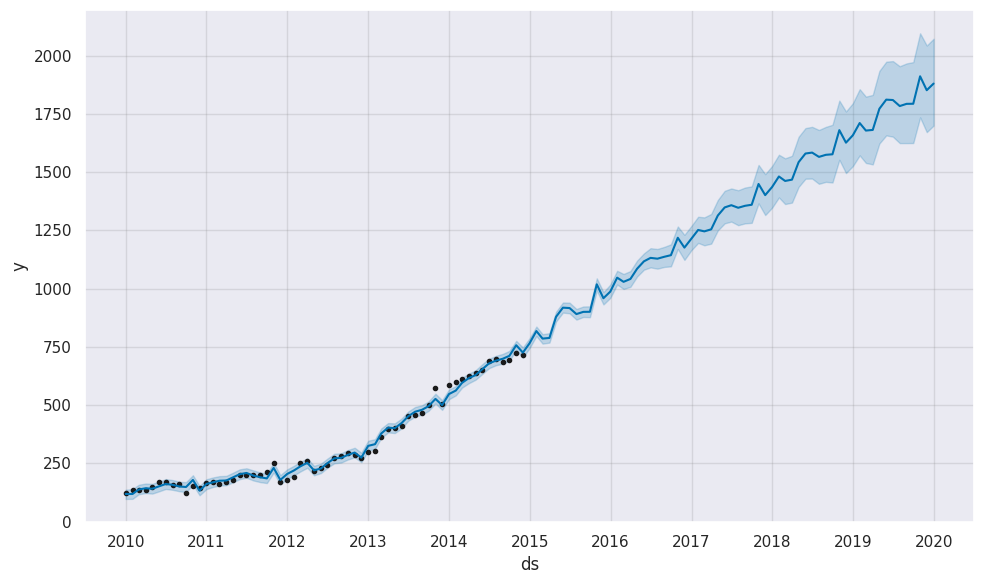

In [35]:
model.plot(prediction)
plt.show()

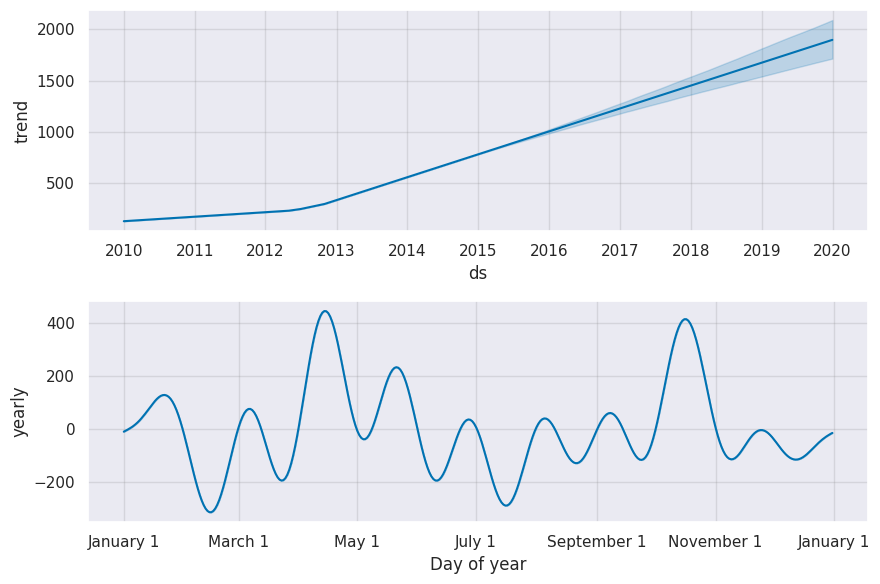

In [36]:
model.plot_components(prediction)
plt.show()